In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
#Importing Data
#os.getcwd()
#os.chdir('C:/Users/DevD/AI & Machine Learning with Python/DataSets')
data = pd.read_csv("CSAT.csv")
print("Shape before deleting duplicate values" , data.shape)

#data=data.drop_duplicates()
#print("Shape after deleting duplicate values" , data.shape)

data.head()

Shape before deleting duplicate values (248, 38)


,Gender,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,target
0,0,4,5,5,4,5,4,4,4,3,5,5,5,5,4,4,4,3,4,4,5,5,4,4,5,4,5,3,5,4,5,4,5,4,5,4,4,5
1,0,5,5,5,5,3,5,3,5,3,4,5,5,5,3,1,5,5,4,3,5,5,5,5,5,5,5,3,5,5,5,5,4,5,5,3,5,5
2,0,1,1,1,5,5,5,3,4,5,5,5,5,4,5,4,5,3,5,5,4,5,5,5,5,5,5,5,5,5,5,5,4,4,5,5,5,4
3,0,4,4,5,4,5,4,4,5,5,5,5,5,4,4,1,4,3,4,4,4,4,5,5,5,4,5,4,4,5,4,4,5,5,4,2,5,4
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
data.info()
data.nunique()

In [ ]:
data.describe(include= "all")

,Gender,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,target
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.754032,3.500000,3.491935,4.141129,4.217742,3.620968,3.435484,3.697581,3.266129,3.383065,3.883065,3.766129,3.411290,3.665323,3.814516,3.330645,3.362903,3.193548,3.923387,3.959677,3.427419,3.459677,3.947581,3.427419,3.875000,3.552419,3.762097,3.133065,4.141129,3.919355,4.048387,3.754032,4.080645,3.471774,3.036290,3.532258,3.217742,3.830645
std,0.431530,1.123903,1.068473,1.033959,0.944282,1.053951,1.100180,0.994557,1.088094,1.103195,1.199880,0.990717,1.138307,1.085834,0.885026,1.070183,1.137044,1.177917,1.112215,1.086533,1.073595,1.025182,1.124477,1.280014,1.199063,1.063412,0.941537,1.188012,1.037867,1.099111,1.086202,1.022017,1.065444,1.123547,1.132289,1.086803,1.269770,1.066393
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.750000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
50%,1.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000
75%,1.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.columns

Index(['Gender', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'target'],
      dtype='object')

### EDA for Feature Selection

In [ ]:
# Plotting multiple bar charts for categorical variables
def PlotBarCharts(inputData,colsToPlot):
  %matplotlib inline
  
  import matplotlib.pyplot as plt

  fig, subPlot = plt.subplots(nrows=1,ncols=len(colsToPlot), figsize=(25,5))
  fig.suptitle('Barchart of' + str(colsToPlot))

  for colName, plotNo in  zip(colsToPlot , range(len(colsToPlot))):
    inputData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNo])  


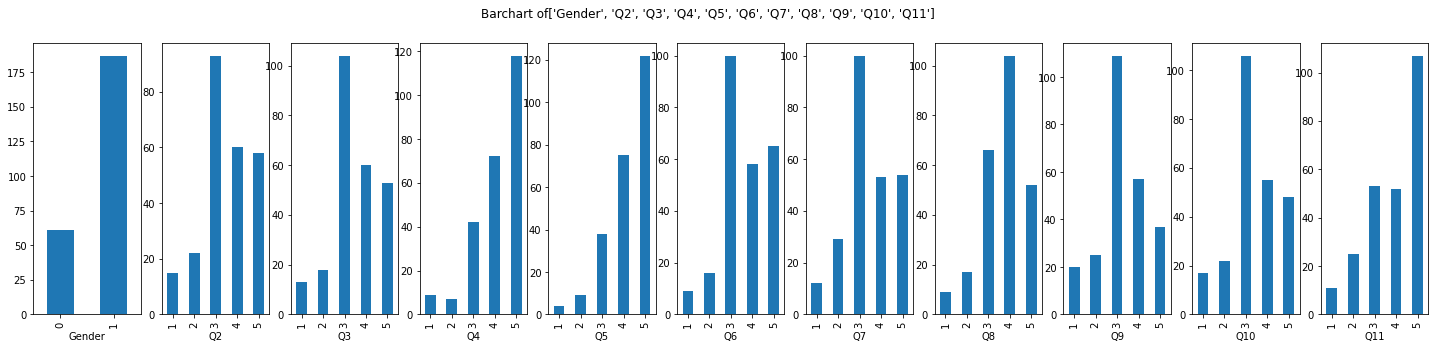

In [ ]:
#Calling the function
PlotBarCharts(inputData=data, colsToPlot=['Gender', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       ])

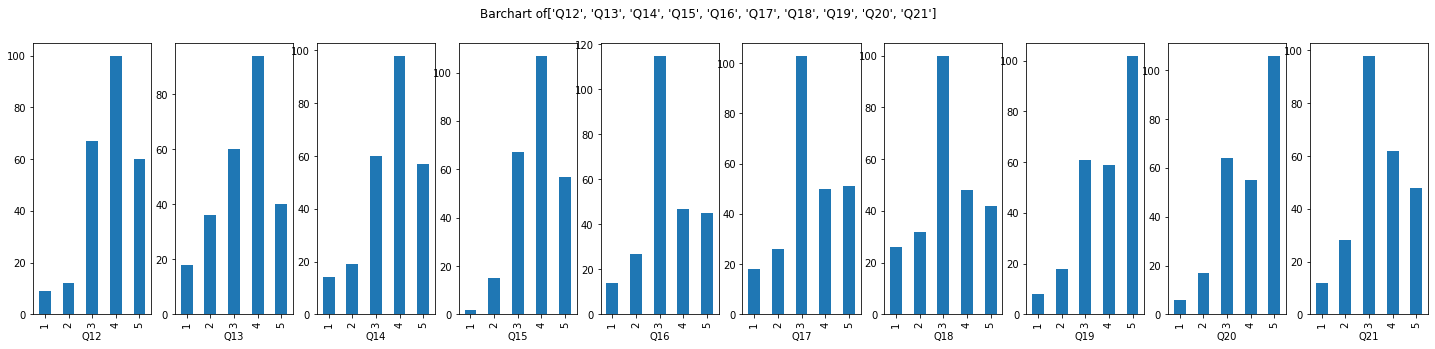

In [ ]:
PlotBarCharts(inputData=data, colsToPlot=['Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       ])

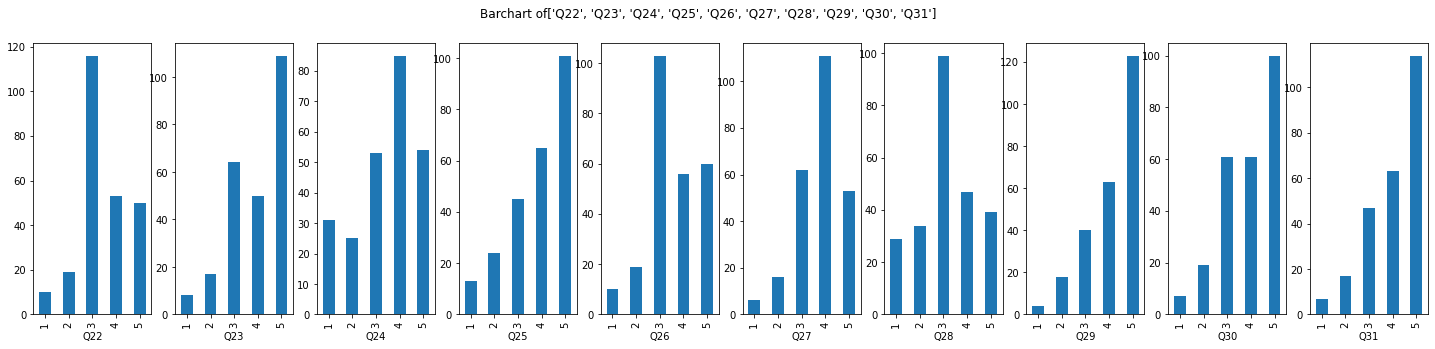

In [ ]:
PlotBarCharts(inputData=data, colsToPlot=['Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       ])

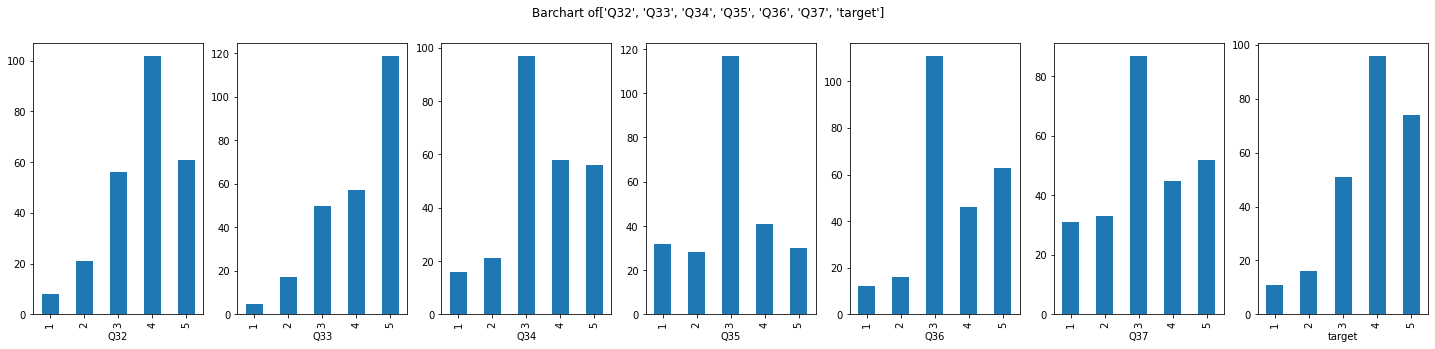

In [ ]:
PlotBarCharts(inputData=data, colsToPlot=['Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'target'])

### Correlation

In [ ]:
correlation = data.corr()
#correlation

In [ ]:
# Filtering only those columns where absolute correlation > 0.2
correlation['target'][abs(correlation['target']) > 0.2 ]

Q2        0.412113
Q3        0.325693
Q4        0.231059
Q6        0.328089
Q7        0.411649
Q8        0.260715
Q9        0.248348
Q10       0.279057
Q11       0.215438
Q12       0.349400
Q13       0.314426
Q14       0.230566
Q16       0.333068
Q17       0.264584
Q18       0.296939
Q19       0.204065
Q20       0.210720
Q21       0.349920
Q22       0.323319
Q23       0.225528
Q24       0.269762
Q25       0.353827
Q26       0.297041
Q27       0.516161
Q28       0.276711
Q29       0.281401
Q30       0.205913
Q31       0.304197
Q32       0.385104
Q34       0.435270
Q35       0.347112
Q36       0.245770
Q37       0.335306
target    1.000000
Name: target, dtype: float64

### Chi Square Test

In [ ]:
def AutoChi(InpData, targetCol, InputCol):
  from scipy.stats import chi2_contingency as ch

  for col in InputCol:
    CrossTab = pd.crosstab(index = InpData[col], columns=InpData[targetCol])
    ChSq = ch(CrossTab)
    if ChSq[1]<=0.05:
      print('Chi-Square test P-Value for',col,'=',ChSq[1])


In [ ]:
AutoChi(InpData=data, targetCol='target',InputCol=['Gender', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37'])

In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalPredictorList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

### Attribute Selection

In [ ]:
CategoricalPredictorList=['Gender','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19',
                          'Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34','Q35','Q36','Q37']
SelectedFeatures = FunctionChisq(inpData=data, 
              TargetVariable='target', 
              CategoricalPredictorList=CategoricalPredictorList)

Gender is NOT correlated with target | P-Value: 0.27206001114700595
Q2 is correlated with target | P-Value: 1.7500431420406568e-10
Q3 is correlated with target | P-Value: 1.1834166773782983e-05
Q4 is correlated with target | P-Value: 9.781383801662532e-05
Q5 is NOT correlated with target | P-Value: 0.12353184284340601
Q6 is correlated with target | P-Value: 0.00033604855754619143
Q7 is correlated with target | P-Value: 1.8107217854094758e-09
Q8 is correlated with target | P-Value: 0.00028177557418800027
Q9 is correlated with target | P-Value: 6.595950324393648e-05
Q10 is correlated with target | P-Value: 0.000110006038874129
Q11 is correlated with target | P-Value: 0.00035115197631903605
Q12 is correlated with target | P-Value: 2.078921820911988e-07
Q13 is correlated with target | P-Value: 1.2503000900440569e-05
Q14 is correlated with target | P-Value: 0.0021883374593410815
Q15 is correlated with target | P-Value: 0.03182844501875633
Q16 is correlated with target | P-Value: 1.802131689

In [ ]:
#ata.isnull().sum()

In [ ]:
dataNum = data

# ML on Full Data
(on 37 features)

In [ ]:
#Seperate Target Variable & Predictor Variables
Target = 'target'
Predictors = ['Gender', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37']

X = dataNum[Predictors].values
y = dataNum[Target].values

#Check the shapes of samples
print(X.shape)
print(y.shape)

(248, 37)
(248,)


### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Creating the model for training data
model = LR.fit(X,y)
pred = model.predict(X)

#Regression Equation
#print(model.intercept_)
#print(model.coef_)

#Goodness of fit of model
from sklearn import metrics
print('Value of R-Square = ',metrics.r2_score(y,model.predict(X)))

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

Value of R-Square =  0.4965810894053898
The RMSE of the model is 0.7551006028310105
The MAE of the model is 0.5676777880030165
Accrracy of test data =  78.85 %


## Tree Models

In [ ]:
# Fitting Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(max_depth=3, criterion='mse')

DTModel = DTReg.fit(X, y)
pred = DTReg.predict(X)

rSq = DTReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.44481616170262617
The RMSE of the model is 0.7929731123540967
The MAE of the model is 0.6291412135391167
Accrracy of test data =  77.35 %


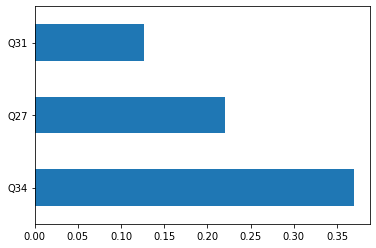

In [ ]:
# Feature by Importance
VarImp = pd.Series(DTModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

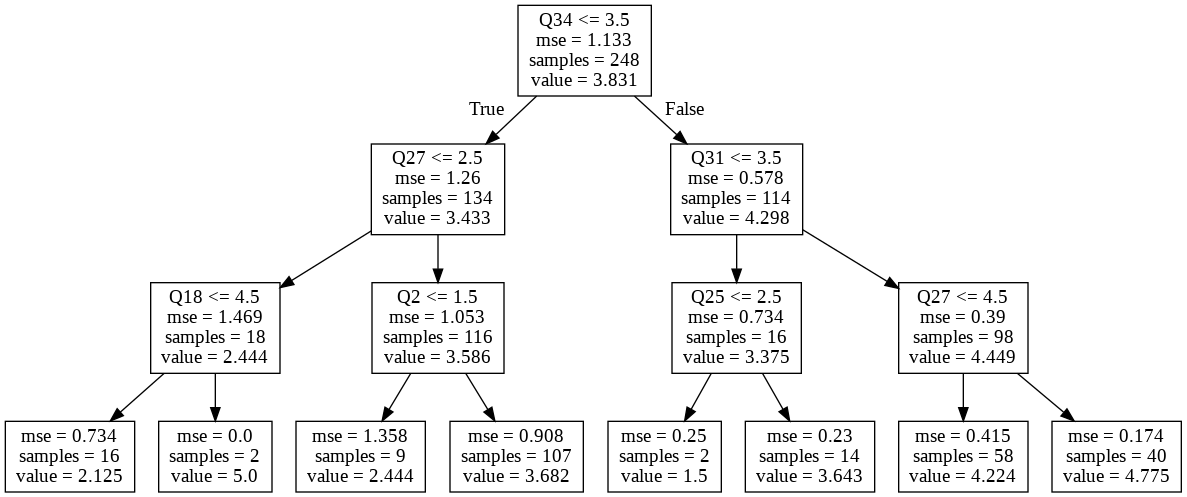

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(DTModel, out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
Dtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(Dtree_graph.create_png())

## Random Forest Regression

In [ ]:
# Fitting Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth = 3, n_estimators = 500, criterion = 'mse')

RFModel = RFReg.fit(X, y)
pred = RFReg.predict(X)

rSq = RFReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.5350956247746941
The RMSE of the model is 0.7256410965113508
The MAE of the model is 0.5742048560082225
Accrracy of test data =  78.6 %


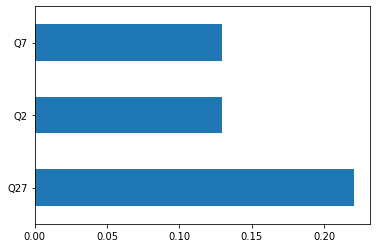

In [ ]:
# Feature by Importance
VarImp = pd.Series(RFModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

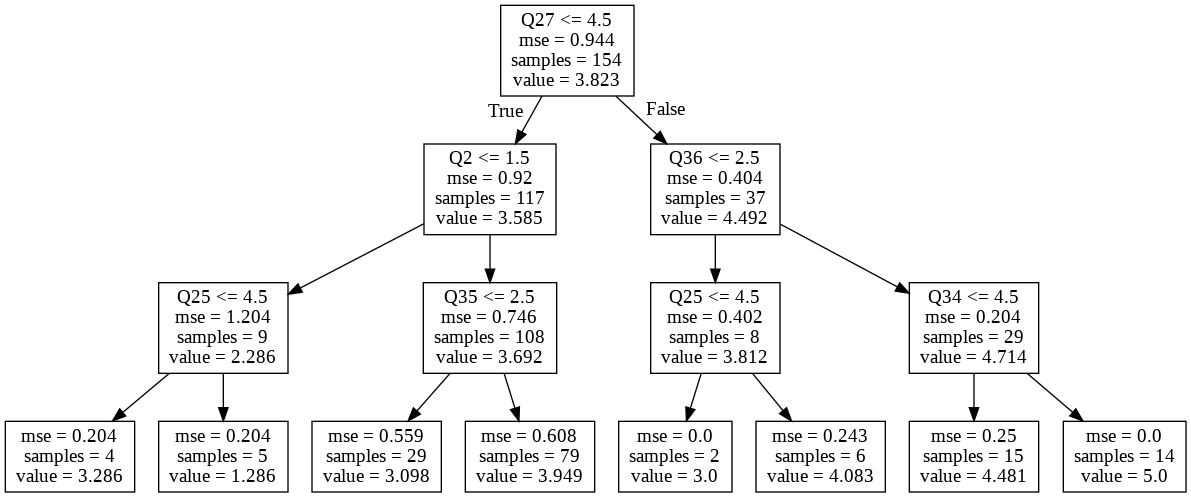

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(RFModel.estimators_[10], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## AdaBoost Regression

In [ ]:
# Fitting AdaBoost Regressor Model(Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
ABReg = AdaBoostRegressor(n_estimators=500, base_estimator=DTR, learning_rate=0.1)

ABModel = ABReg.fit(X, y)
pred = ABReg.predict(X)

rSq = ABReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.6024488152959355
The RMSE of the model is 0.6710217236359749
The MAE of the model is 0.5608122875433139
Accrracy of test data =  80.54 %


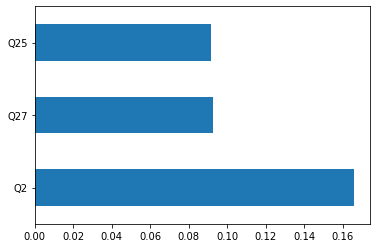

In [ ]:
# Feature by Importance
VarImp = pd.Series(ABModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

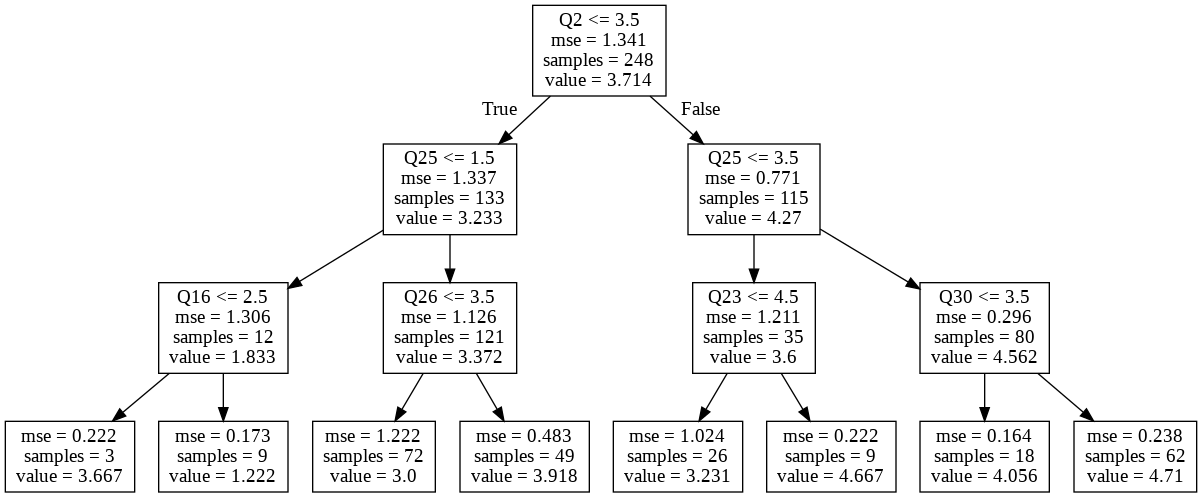

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(ABModel.estimators_[5], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## XGBoost Regression

In [ ]:
# Fitting Random Forest Regressor Model
from xgboost import XGBRegressor
XGBReg = XGBRegressor(max_depth = 3, learning_rate=0.8, n_estimators = 500, objective='reg:linear', booster='gbtree')

XGBModel = XGBReg.fit(X, y)
pred = XGBReg.predict(X)

rSq = XGBReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

[06:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Square value is:  0.9686352426223493
The RMSE of the model is 0.18847815438609133
The MAE of the model is 0.031301702943540385
Accrracy of test data =  99.04 %


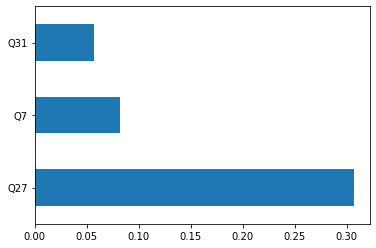

In [ ]:
# Feature by Importance
VarImp = pd.Series(XGBModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

## Multilayer Perceptron

In [ ]:
X.shape

(248, 37)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Creat the ANN
model = Sequential()

model.add(Dense(units=50,input_dim=37,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=15,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1,kernel_initializer='normal'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X,y,batch_size=10,epochs=100,verbose=0)

In [ ]:
# Predictions on testing data
Predictions=model.predict(X)
TestingData=pd.DataFrame(data=X, columns=Predictors)
TestingData['Target']=y
TestingData['PredictedTarget']=Predictions
TestingData['APE'] = np.abs((y-pred)/y) * 100
TestingData.sort_values(by = 'APE',ascending=True).head(3)

,Gender,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Target,PredictedTarget,APE
187,1,4,5,5,4,5,4,4,4,4,5,4,5,5,5,5,5,3,3,3,3,3,4,4,3,4,5,5,4,3,5,4,4,5,3,4,5,5,5.046221,0.001020
126,1,3,2,4,3,2,2,3,4,5,3,3,4,3,5,4,3,2,4,4,4,4,3,3,4,3,3,2,3,3,4,3,3,3,4,3,2,3,3.301529,0.001152
204,1,3,3,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,4,5,5,5,5,5,5,4.795380,0.001545


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)


MAPE = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
MedianAPE = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)


#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

The RMSE of the model is 0.18847815438609133
The MAE of the model is 0.031301702943540385
Accrracy of test data =  99.04 %


# ML on selected features
(on 35 features)

In [ ]:
#Seperate Target Variable & Predictor Variables
Target = 'target'
Predictors = SelectedFeatures

X = dataNum[Predictors].values
y = dataNum[Target].values

#Check the shapes of samples
print(X.shape)
print(y.shape)

(248, 35)
(248,)


### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Creating the model for training data
model = LR.fit(X,y)
pred = model.predict(X)

#Regression Equation
#print(model.intercept_)
#print(model.coef_)

#Goodness of fit of model
from sklearn import metrics
print('Value of R-Square = ',metrics.r2_score(y,model.predict(X)))

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

Value of R-Square =  0.49137492456490983
The RMSE of the model is 0.7589950401085276
The MAE of the model is 0.5749990179663332
Accrracy of test data =  78.61 %


## Tree Models

In [ ]:
# Fitting Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(max_depth=3, criterion='mse')

DTModel = DTReg.fit(X, y)
pred = DTReg.predict(X)

rSq = DTReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.44481616170262617
The RMSE of the model is 0.7929731123540967
The MAE of the model is 0.6291412135391167
Accrracy of test data =  77.35 %


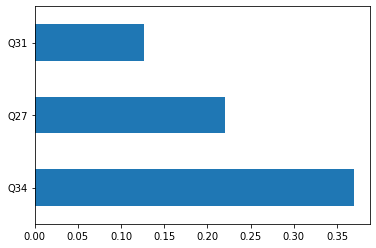

In [ ]:
# Feature by Importance
VarImp = pd.Series(DTModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

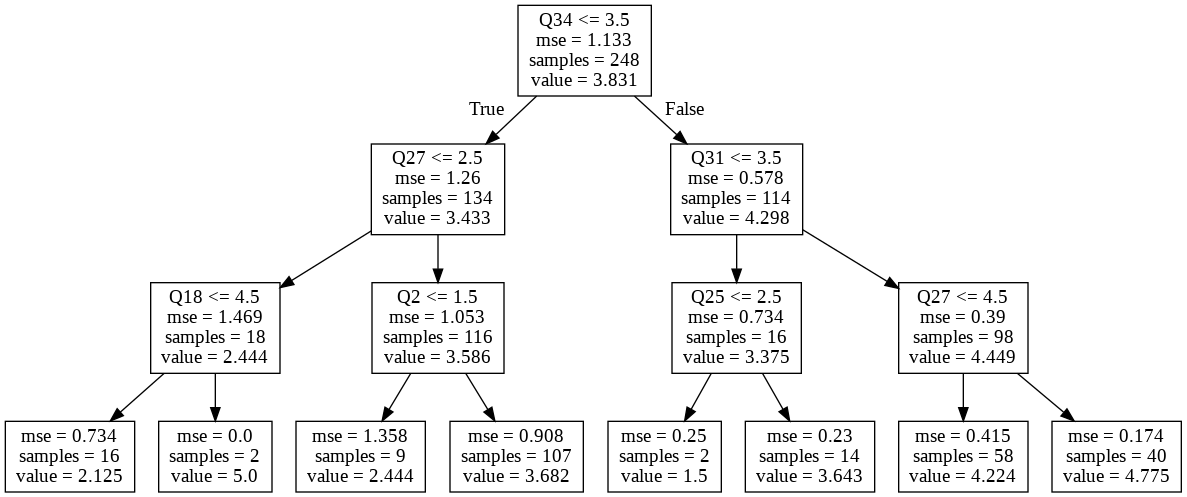

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(DTModel, out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
Dtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(Dtree_graph.create_png())

## Random Forest Regression

In [ ]:
# Fitting Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth = 3, n_estimators = 500, criterion = 'mse')

RFModel = RFReg.fit(X, y)
pred = RFReg.predict(X)

rSq = RFReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.5368094747284198
The RMSE of the model is 0.7243023392315685
The MAE of the model is 0.573229355898707
Accrracy of test data =  78.73 %


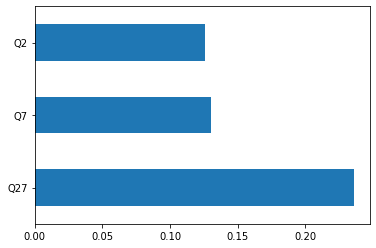

In [ ]:
# Feature by Importance
VarImp = pd.Series(RFModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

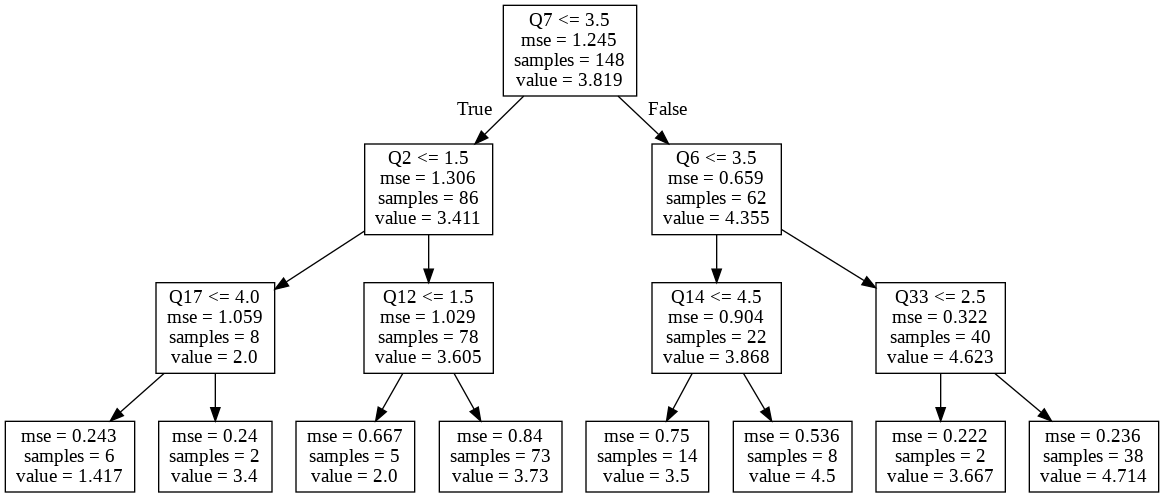

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(RFModel.estimators_[10], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## AdaBoost Regression

In [ ]:
# Fitting AdaBoost Regressor Model(Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
ABReg = AdaBoostRegressor(n_estimators=500, base_estimator=DTR, learning_rate=0.05)

ABModel = ABReg.fit(X, y)
pred = ABReg.predict(X)

rSq = ABReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.6117569435853305
The RMSE of the model is 0.6631196583472065
The MAE of the model is 0.5507676190430829
Accrracy of test data =  81.01 %


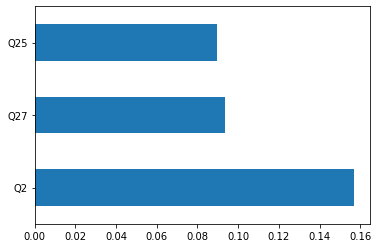

In [ ]:
# Feature by Importance
VarImp = pd.Series(ABModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

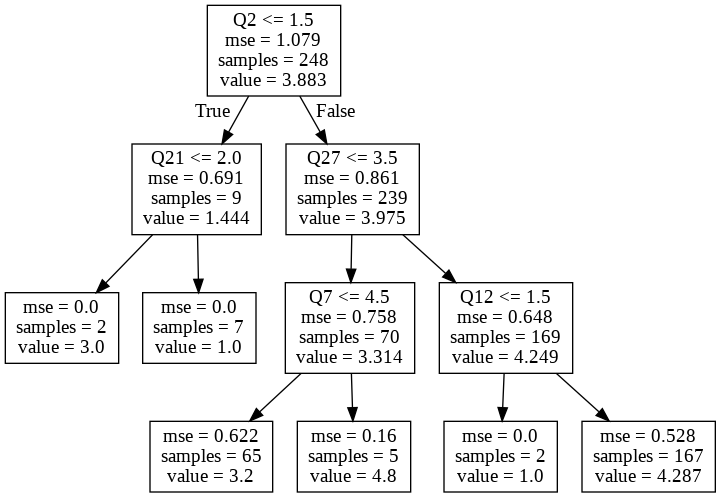

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(ABModel.estimators_[5], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## XGBoost Regression

In [ ]:
# Fitting Random Forest Regressor Model
from xgboost import XGBRegressor
XGBReg = XGBRegressor(max_depth = 3, learning_rate=0.5, n_estimators = 500, objective='reg:linear', booster='gbtree')

XGBModel = XGBReg.fit(X, y)
pred = XGBReg.predict(X)

rSq = XGBReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

[06:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Square value is:  0.9666333636407973
The RMSE of the model is 0.1944000034852552
The MAE of the model is 0.03939888385995742
Accrracy of test data =  98.81 %


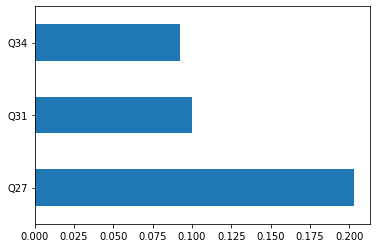

In [ ]:
# Feature by Importance
VarImp = pd.Series(XGBModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

## Multilayer Perceptron

In [ ]:
X.shape

(248, 35)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Creat the ANN
model = Sequential()

model.add(Dense(units=50,input_dim=35,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=15,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1,kernel_initializer='normal'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X,y,batch_size=10,epochs=100,verbose=0)

In [ ]:
# Predictions on testing data
Predictions=model.predict(X)
TestingData=pd.DataFrame(data=X, columns=Predictors)
TestingData['Target']=y
TestingData['PredictedTarget']=Predictions
TestingData['APE'] = np.abs((y-pred)/y) * 100
TestingData.sort_values(by = 'APE',ascending=True).head(3)

,Q2,Q3,Q4,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Target,PredictedTarget,APE
53,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,4,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5.303648,0.000582
159,4,4,4,3,2,3,3,3,3,3,2,2,3,2,2,2,3,2,2,2,2,2,2,2,3,1,2,2,2,3,3,2,2,3,2,3,3.076784,0.000660
219,4,4,5,5,2,4,3,5,5,5,4,3,3,3,4,3,3,4,3,2,5,3,3,4,4,4,4,5,5,5,5,5,4,5,3,5,4.025587,0.000687


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.mean(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

The RMSE of the model is 0.1944000034852552
The MAE of the model is 0.03939888385995742
Accrracy of test data =  98.81 %


# Integration of Kano Model




In [ ]:
#Importing Data
dataK = pd.read_csv("CSAT_Kano.csv")
print("Shape before deleting duplicate values" , dataK.shape)
dataK.head()

Shape before deleting duplicate values (248, 38)


,Gender,Code2,Code3,Code4,Code5,Code6,Code7,Code8,Code9,Code10,Code11,Code12,Code13,Code14,Code15,Code16,Code17,Code18,Code19,Code20,Code21,Code22,Code23,Code24,Code25,Code26,Code27,Code28,Code29,Code30,Code31,Code32,Code33,Code34,Code35,Code36,Code37,target
0,0,1,1,2,1,1,1,5,5,5,1,1,1,1,2,2,2,5,1,5,1,1,2,2,1,5,1,3,1,3,1,2,1,1,1,5,5,5
1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5
2,0,4,4,4,3,2,2,1,2,1,1,2,1,2,1,2,1,1,2,1,2,1,1,1,1,2,2,5,1,1,1,3,1,1,2,1,1,4
3,0,1,1,1,2,1,1,2,1,1,1,1,1,1,2,1,1,2,2,1,2,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,4
4,1,2,4,2,3,1,3,3,3,3,5,3,4,3,3,3,5,4,3,3,3,4,3,5,4,4,3,3,3,4,4,4,4,4,4,4,4,3


In [ ]:
dataK.info()
dataK.nunique()

In [ ]:
dataK.columns

Index(['Gender', 'Code2', 'Code3', 'Code4', 'Code5', 'Code6', 'Code7', 'Code8',
       'Code9', 'Code10', 'Code11', 'Code12', 'Code13', 'Code14', 'Code15',
       'Code16', 'Code17', 'Code18', 'Code19', 'Code20', 'Code21', 'Code22',
       'Code23', 'Code24', 'Code25', 'Code26', 'Code27', 'Code28', 'Code29',
       'Code30', 'Code31', 'Code32', 'Code33', 'Code34', 'Code35', 'Code36',
       'Code37', 'target'],
      dtype='object')

In [ ]:
correlation = dataK.corr()
#correlation

In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Price
correlation['target'][abs(correlation['target']) > 0.2 ]

Code13   -0.202728
Code33   -0.263897
Code34   -0.269806
Code37   -0.238573
target    1.000000
Name: target, dtype: float64

In [ ]:
def AutoChi(InpData, targetCol, InputCol):
  from scipy.stats import chi2_contingency as ch

  for col in InputCol:
    CrossTab = pd.crosstab(index = InpData[col], columns=InpData[targetCol])
    ChSq = ch(CrossTab)
    if ChSq[1]<=0.05:
      print('Chi-Square test P-Value for',col,'=',ChSq[1])


In [ ]:
AutoChi(InpData=dataK, targetCol='target',InputCol=['Gender', 'Code2', 'Code3', 'Code4', 'Code5', 'Code6', 'Code7', 'Code8',
       'Code9', 'Code10', 'Code11', 'Code12', 'Code13', 'Code14', 'Code15',
       'Code16', 'Code17', 'Code18', 'Code19', 'Code20', 'Code21', 'Code22',
       'Code23', 'Code24', 'Code25', 'Code26', 'Code27', 'Code28', 'Code29',
       'Code30', 'Code31', 'Code32', 'Code33', 'Code34', 'Code35', 'Code36',
       'Code37'])

In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalPredictorList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

### Attribute Selection

In [ ]:
CategoricalPredictorList=['Gender', 'Code2', 'Code3', 'Code4', 'Code5', 'Code6', 'Code7', 'Code8',
       'Code9', 'Code10', 'Code11', 'Code12', 'Code13', 'Code14', 'Code15',
       'Code16', 'Code17', 'Code18', 'Code19', 'Code20', 'Code21', 'Code22',
       'Code23', 'Code24', 'Code25', 'Code26', 'Code27', 'Code28', 'Code29',
       'Code30', 'Code31', 'Code32', 'Code33', 'Code34', 'Code35', 'Code36',
       'Code37']
SelectedAttributes = FunctionChisq(inpData=dataK, 
              TargetVariable='target', 
              CategoricalPredictorList=CategoricalPredictorList)

Gender is NOT correlated with target | P-Value: 0.27206001114700595
Code2 is correlated with target | P-Value: 0.013460197052177653
Code3 is NOT correlated with target | P-Value: 0.33993739862757183
Code4 is NOT correlated with target | P-Value: 0.6673035681816188
Code5 is NOT correlated with target | P-Value: 0.599109435634223
Code6 is NOT correlated with target | P-Value: 0.41037337183435335
Code7 is NOT correlated with target | P-Value: 0.08588377206697374
Code8 is NOT correlated with target | P-Value: 0.9331572349774634
Code9 is NOT correlated with target | P-Value: 0.08532367209804723
Code10 is NOT correlated with target | P-Value: 0.5846470499493251
Code11 is correlated with target | P-Value: 0.04994451275701456
Code12 is NOT correlated with target | P-Value: 0.571924575480545
Code13 is NOT correlated with target | P-Value: 0.0995117767219583
Code14 is NOT correlated with target | P-Value: 0.6905498995099166
Code15 is correlated with target | P-Value: 0.03031203070621798
Code16 i

In [ ]:
#SelectedAttributes.append('Code9')
#SelectedAttributes.append('Code20')
#SelectedAttributes


In [ ]:
dataNum = dataK

In [ ]:
# Plotting multiple bar charts for categorical variables
def PlotBarCharts(inputData,colsToPlot):
  %matplotlib inline
  
  import matplotlib.pyplot as plt

  fig, subPlot = plt.subplots(nrows=1,ncols=len(colsToPlot), figsize=(25,5))
  fig.suptitle('Barchart of' + str(colsToPlot))

  for colName, plotNo in  zip(colsToPlot , range(len(colsToPlot))):
    inputData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNo])  


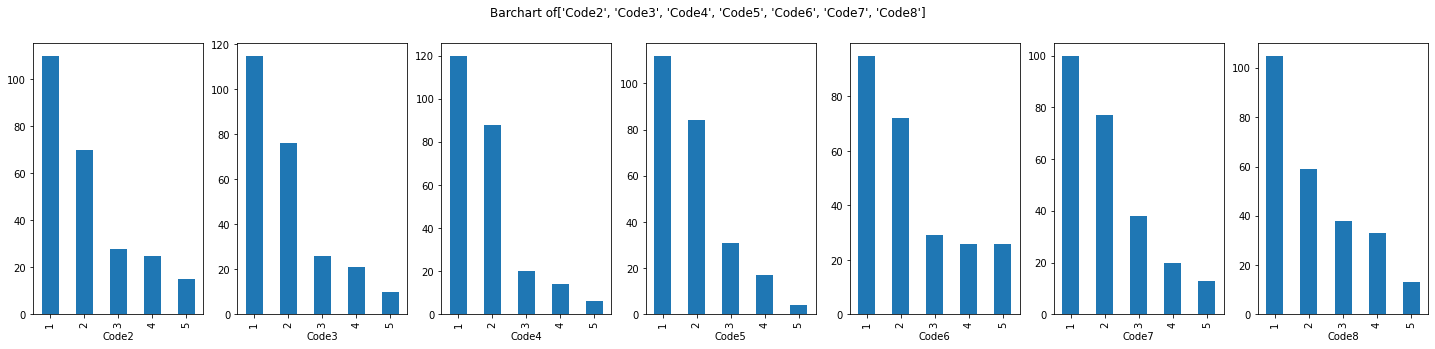

In [ ]:
#Calling the function
PlotBarCharts(inputData=dataK, colsToPlot=['Code2', 'Code3', 'Code4', 'Code5', 'Code6', 'Code7', 'Code8'])

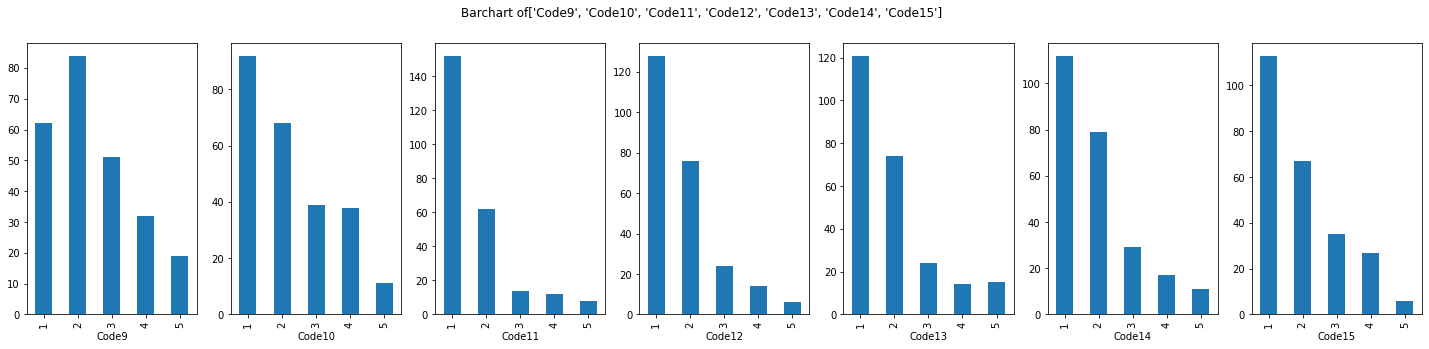

In [ ]:
PlotBarCharts(inputData=dataK, colsToPlot=['Code9', 'Code10', 'Code11', 'Code12', 'Code13', 'Code14', 'Code15'])

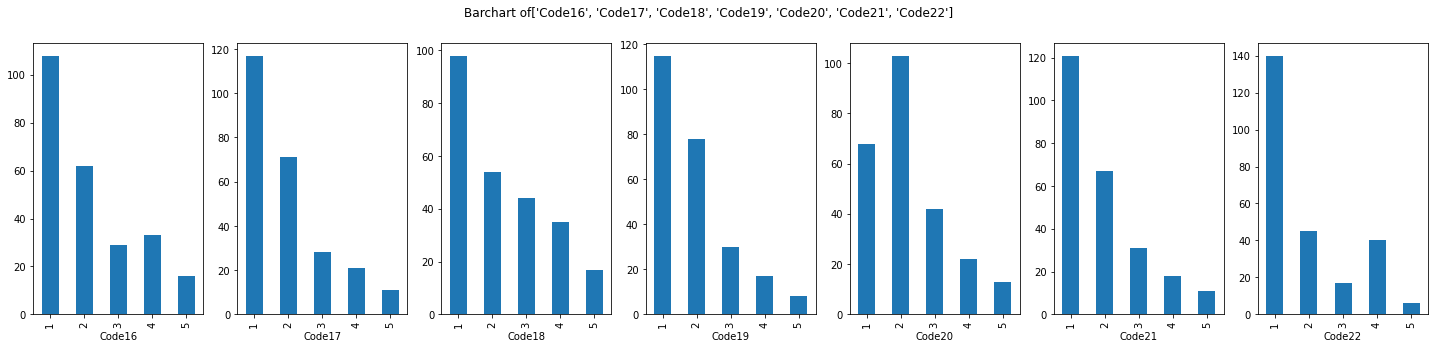

In [ ]:
PlotBarCharts(inputData=dataK, colsToPlot=['Code16', 'Code17', 'Code18', 'Code19', 'Code20', 'Code21', 'Code22'])

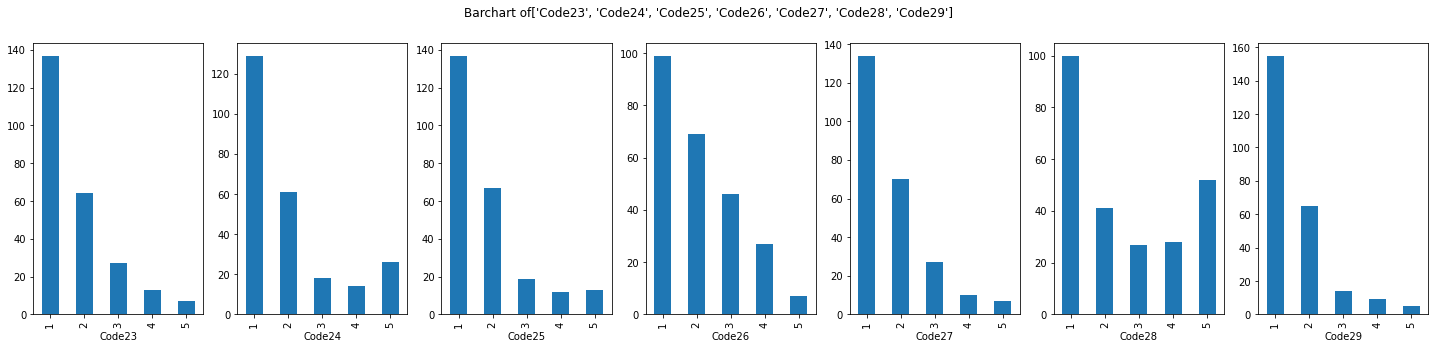

In [ ]:
PlotBarCharts(inputData=dataK, colsToPlot=['Code23', 'Code24', 'Code25', 'Code26', 'Code27', 'Code28', 'Code29'])

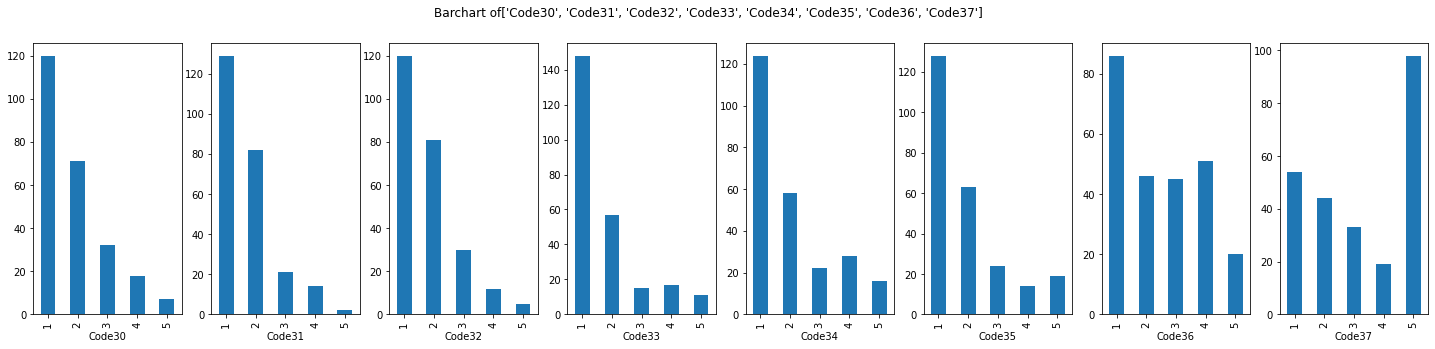

In [ ]:
PlotBarCharts(inputData=dataK, colsToPlot=['Code30', 'Code31', 'Code32', 'Code33', 'Code34', 'Code35', 'Code36','Code37'])

# ML on all attributes
(on 37 attributes)

In [ ]:
#Seperate Target Variable & Predictor Variables
Target = 'target'
Predictors = ['Gender', 'Code2', 'Code3', 'Code4', 'Code5', 'Code6', 'Code7', 'Code8',
       'Code9', 'Code10', 'Code11', 'Code12', 'Code13', 'Code14', 'Code15',
       'Code16', 'Code17', 'Code18', 'Code19', 'Code20', 'Code21', 'Code22',
       'Code23', 'Code24', 'Code25', 'Code26', 'Code27', 'Code28', 'Code29',
       'Code30', 'Code31', 'Code32', 'Code33', 'Code34', 'Code35', 'Code36',
       'Code37']

X = dataNum[Predictors].values
y = dataNum[Target].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

#Check the shapes of samples
print(X.shape)
print(y.shape)

(248, 37)
(248,)


## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Creating the model for training data
model = LR.fit(X,y)
pred = model.predict(X)

#Regression Equation
#print(model.intercept_)
#print(model.coef_)

#Goodness of fit of model
from sklearn import metrics
print('Value of R-Square = ',metrics.r2_score(y,model.predict(X)))

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

Value of R-Square =  0.24250921489758015
The RMSE of the model is 0.9262510882424133
The MAE of the model is 0.719507281457841
Accrracy of test data =  86.73 %


## Tree Models

In [ ]:
# Fitting Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(max_depth=3, criterion='mse')

DTModel = DTReg.fit(X, y)
pred = DTReg.predict(X)

rSq = DTReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.27754041924863493
The RMSE of the model is 0.9045796880273964
The MAE of the model is 0.7210332700218806
Accrracy of test data =  83.93 %


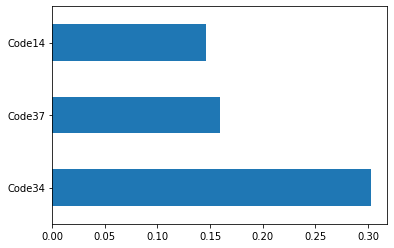

In [ ]:
# Feature by Importance
VarImp = pd.Series(DTModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')


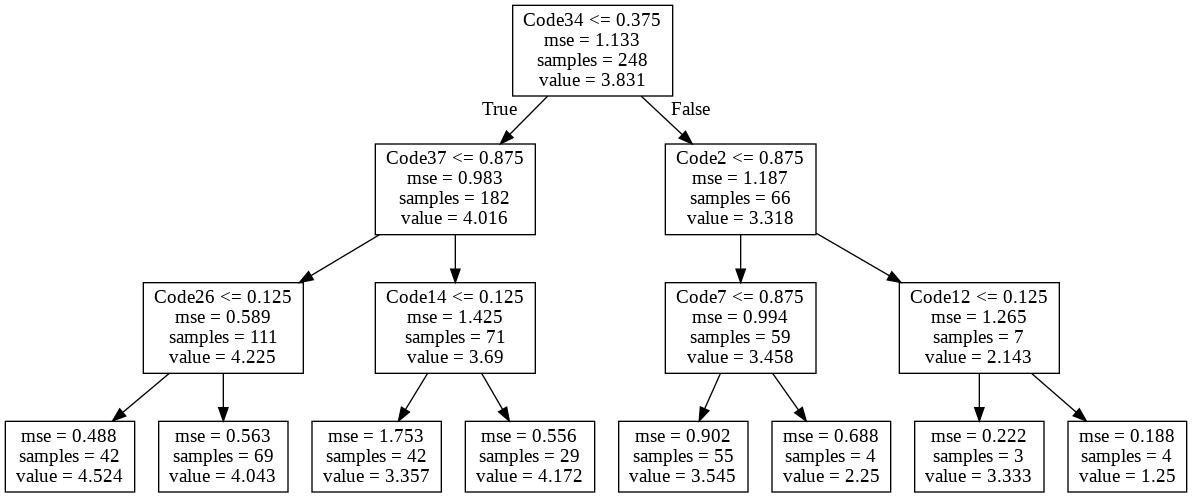

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(DTModel, out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
Dtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(Dtree_graph.create_png())

## Random Forest Regression

In [ ]:
# Fitting Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth = 3, n_estimators = 500, criterion = 'mse')

RFModel = RFReg.fit(X, y)
pred = RFReg.predict(X)

rSq = RFReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.3372857578327235
The RMSE of the model is 0.8663696025361773
The MAE of the model is 0.6710264787303674
Accrracy of test data =  85.27 %


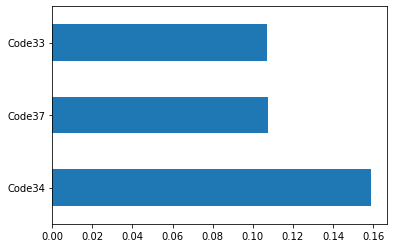

In [ ]:
# Feature by Importance
VarImp = pd.Series(RFModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

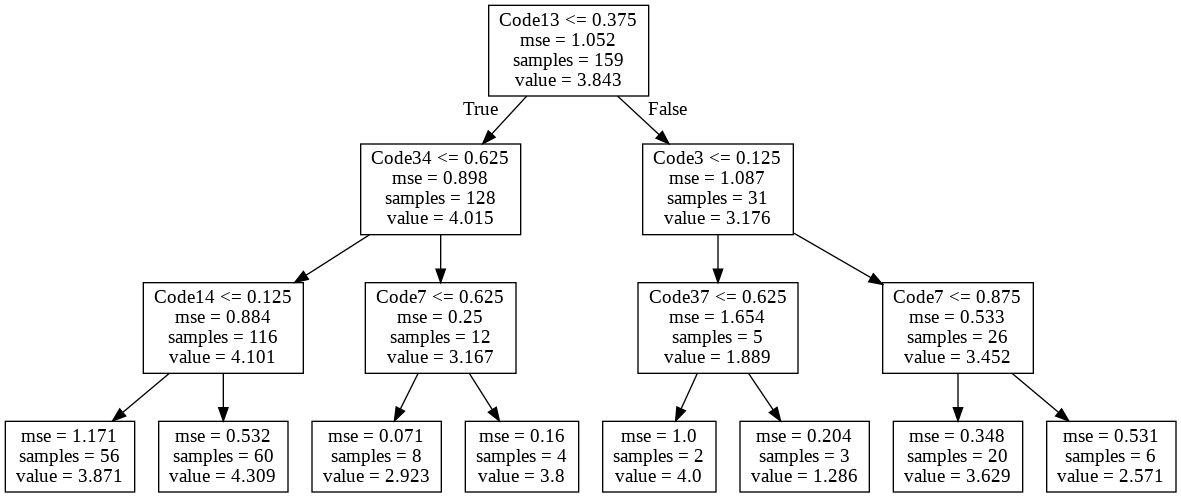

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(RFModel.estimators_[10], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## AdaBoost Regression

In [ ]:
# Fitting AdaBoost Regressor Model(Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
ABReg = AdaBoostRegressor(n_estimators=500, base_estimator=DTR, learning_rate=0.05)

ABModel = ABReg.fit(X, y)
pred = ABReg.predict(X)

rSq = ABReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)
#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.38147127880243026
The RMSE of the model is 0.8369894610675002
The MAE of the model is 0.6633164146927627
Accrracy of test data =  84.68 %


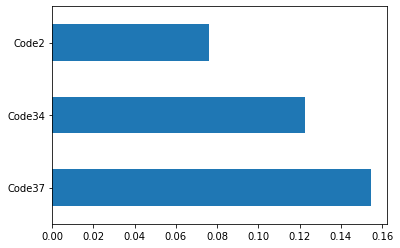

In [ ]:
# Feature by Importance
VarImp = pd.Series(ABModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

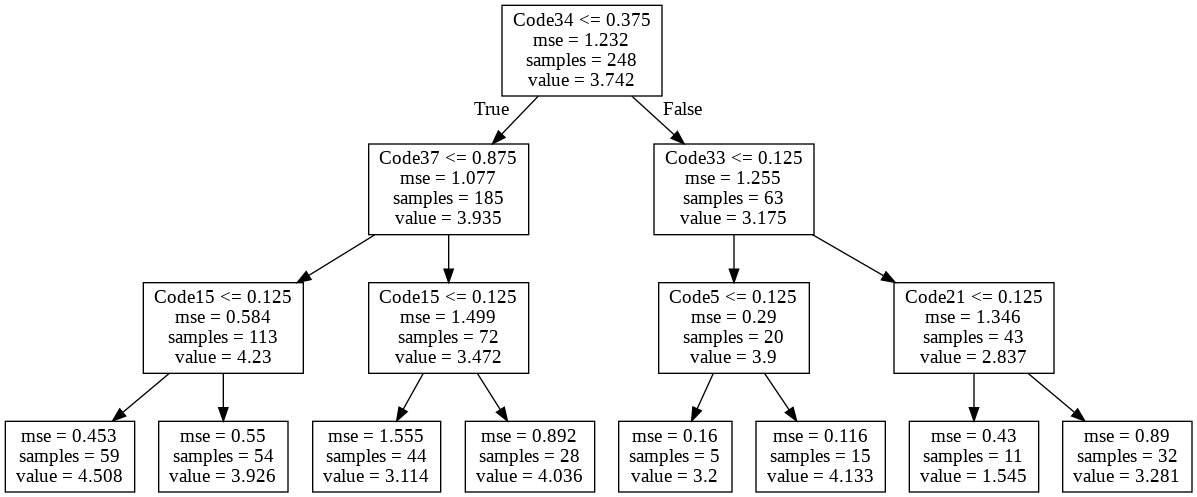

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(ABModel.estimators_[5], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## XGBoost Regression

In [ ]:
# Fitting Random Forest Regressor Model
from xgboost import XGBRegressor
XGBReg = XGBRegressor(max_depth = 3, learning_rate=0.1, n_estimators = 1000, objective='reg:linear', booster='gbtree')

XGBModel = XGBReg.fit(X, y)
pred = XGBReg.predict(X)

rSq = XGBReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

[06:33:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Square value is:  0.9660437556952063
The RMSE of the model is 0.19611006291037902
The MAE of the model is 0.0700232477918748
Accrracy of test data =  99.55 %


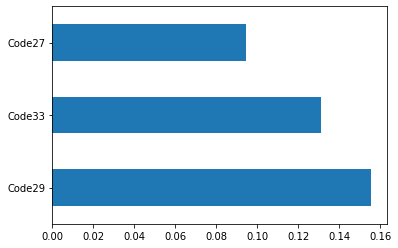

In [ ]:
# Feature by Importance
VarImp = pd.Series(XGBModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
plt.show()

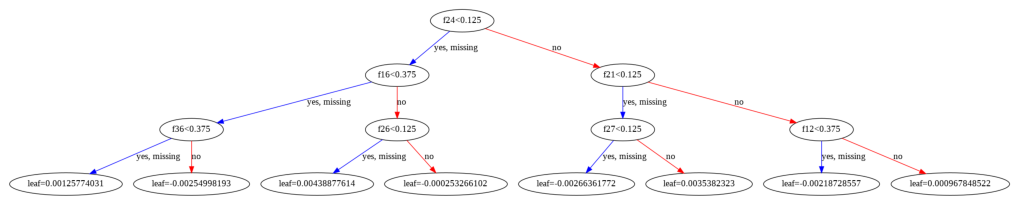

In [ ]:
#Load Libraries
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,10))
plot_tree(XGBReg, num_trees=500, ax=ax)
plt.show()

## Multilayer Perceptron

In [ ]:
X.shape

(248, 37)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Creat the ANN
model = Sequential()

model.add(Dense(units=50,input_dim=37,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=50,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1,kernel_initializer='normal'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X,y,batch_size=10,epochs=100,verbose=0)

In [ ]:
# Predictions on testing data
Predictions=model.predict(X)
TestingData=pd.DataFrame(data=X, columns=Predictors)
TestingData['Target']=y
TestingData['PredictedTarget']=Predictions
TestingData['APE'] = np.abs((y-pred)/y) * 100
TestingData.sort_values(by = 'APE',ascending=True).head()

,Gender,Code2,Code3,Code4,Code5,Code6,Code7,Code8,Code9,Code10,Code11,Code12,Code13,Code14,Code15,Code16,Code17,Code18,Code19,Code20,Code21,Code22,Code23,Code24,Code25,Code26,Code27,Code28,Code29,Code30,Code31,Code32,Code33,Code34,Code35,Code36,Code37,Target,PredictedTarget,APE
75,1.0,0.00,0.00,0.00,0.25,0.25,0.75,0.75,0.75,0.75,0.00,0.00,0.25,0.00,0.25,0.75,0.0,0.25,0.50,0.75,0.75,0.00,0.00,1.00,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.25,0.00,0.00,1.00,1.00,1.00,4,4.021466,0.001055
169,1.0,0.50,0.00,0.00,0.50,0.25,0.75,0.75,0.75,0.75,0.25,0.25,0.00,0.75,0.75,0.00,0.5,0.75,0.75,0.75,0.00,0.25,0.50,1.00,0.00,0.75,0.00,0.00,0.25,0.00,0.75,0.50,0.00,0.00,1.00,0.75,0.50,5,4.746624,0.001116
43,1.0,0.75,0.75,0.75,0.25,1.00,0.75,0.50,0.25,0.75,0.25,0.75,0.75,0.75,0.25,0.50,0.5,0.50,0.75,0.75,0.75,0.75,0.75,0.50,0.75,0.50,0.50,0.75,0.25,0.25,0.25,0.25,0.00,0.75,0.50,1.00,0.75,4,3.681393,0.001466
4,1.0,0.25,0.75,0.25,0.50,0.00,0.50,0.50,0.50,0.50,1.00,0.50,0.75,0.50,0.50,0.50,1.0,0.75,0.50,0.50,0.50,0.75,0.50,1.00,0.75,0.75,0.50,0.50,0.50,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,3,3.260642,0.003576
112,0.0,0.00,1.00,0.25,0.25,0.50,0.25,0.25,0.00,0.25,0.00,0.25,0.25,0.00,0.50,0.75,0.0,0.00,0.25,0.25,0.50,0.00,0.25,0.25,0.25,0.00,0.75,0.00,1.00,1.00,0.25,0.25,0.50,0.50,1.00,1.00,1.00,4,3.960689,0.003648


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)


#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

The RMSE of the model is 0.19611006291037902
The MAE of the model is 0.0700232477918748
Accrracy of test data =  99.55 %


In [ ]:
SelectedAttributes

['Code2',
 'Code11',
 'Code15',
 'Code16',
 'Code21',
 'Code24',
 'Code25',
 'Code26',
 'Code27',
 'Code29',
 'Code31',
 'Code33',
 'Code34',
 ['Code9', 'Code20']]

# ML on selected attributes
(on 15 attributes)

In [ ]:
#Seperate Target Variable & Predictor Variables
Target = 'target'
Predictors = SelectedAttributes

X = dataNum[Predictors].values
y = dataNum[Target].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

#Check the shapes of samples
print(X.shape)
print(y.shape)

(248, 13)
(248,)


## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Creating the model for training data
model = LR.fit(X,y)
pred = model.predict(X)

#Regression Equation
#print(model.intercept_)
#print(model.coef_)

#Goodness of fit of model
from sklearn import metrics
print('Value of R-Square = ',metrics.r2_score(y,model.predict(X)))

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

Value of R-Square =  0.12182562495096638
The RMSE of the model is 0.9973105986186025
The MAE of the model is 0.7602836008195214
Accrracy of test data =  83.31 %


## Tree Models

In [ ]:
# Fitting Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(max_depth=3, criterion='mse')

DTModel = DTReg.fit(X, y)
pred = DTReg.predict(X)

rSq = DTReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.22045132243581866
The RMSE of the model is 0.9396403842719281
The MAE of the model is 0.7089740635708378
Accrracy of test data =  81.26 %


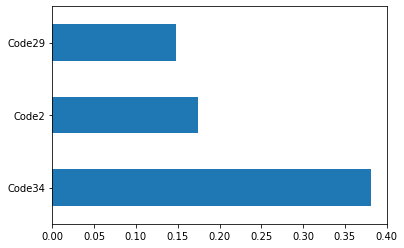

In [ ]:
# Feature by Importance
VarImp = pd.Series(DTModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

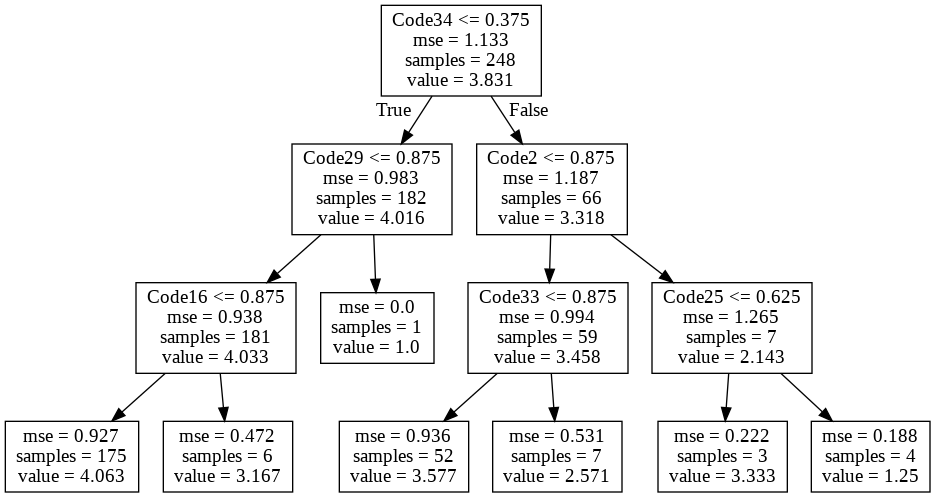

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(DTModel, out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
Dtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(Dtree_graph.create_png())

## Random Forest Regression

In [ ]:
# Fitting Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth = 3, n_estimators = 500, criterion = 'mse')

RFModel = RFReg.fit(X, y)
pred = RFReg.predict(X)

rSq = RFReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.26901836822713054
The RMSE of the model is 0.9098992064525606
The MAE of the model is 0.6839486874336769
Accrracy of test data =  81.81 %


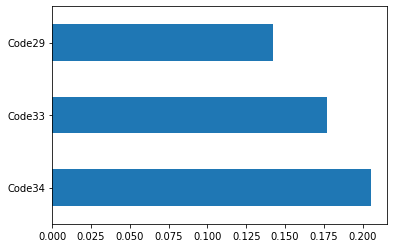

In [ ]:
# Feature by Importance
VarImp = pd.Series(RFModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

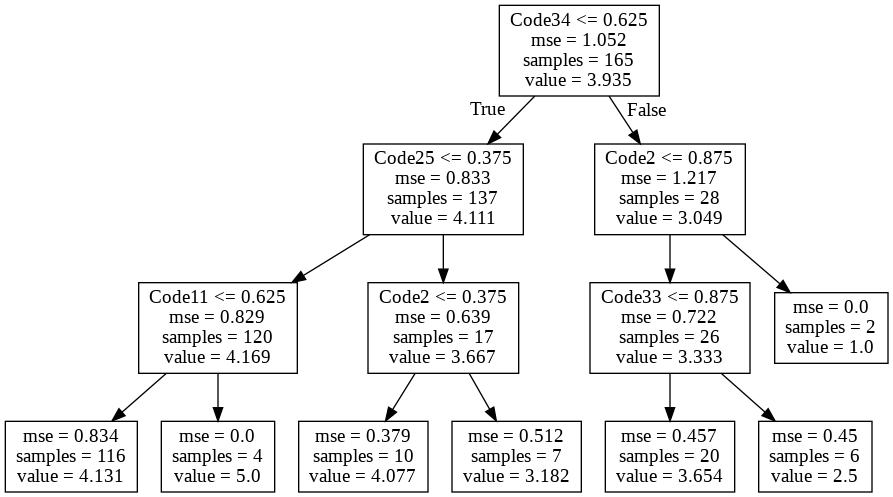

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(RFModel.estimators_[10], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## AdaBoost Regression

In [ ]:
# Fitting AdaBoost Regressor Model(Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
ABReg = AdaBoostRegressor(n_estimators=500, base_estimator=DTR, learning_rate=0.05)

ABModel = ABReg.fit(X, y)
pred = ABReg.predict(X)

rSq = ABReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.2662133210359464
The RMSE of the model is 0.9116433449160912
The MAE of the model is 0.7128437026771275
Accrracy of test data =  82.27 %


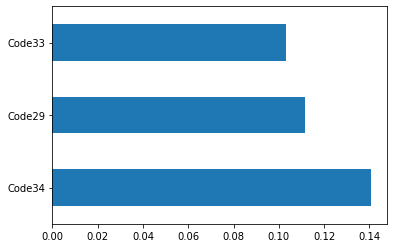

In [ ]:
# Feature by Importance
VarImp = pd.Series(ABModel.feature_importances_ , index = Predictors)
VarImp.nlargest(3).plot(kind = 'barh')
#print(VarImp)

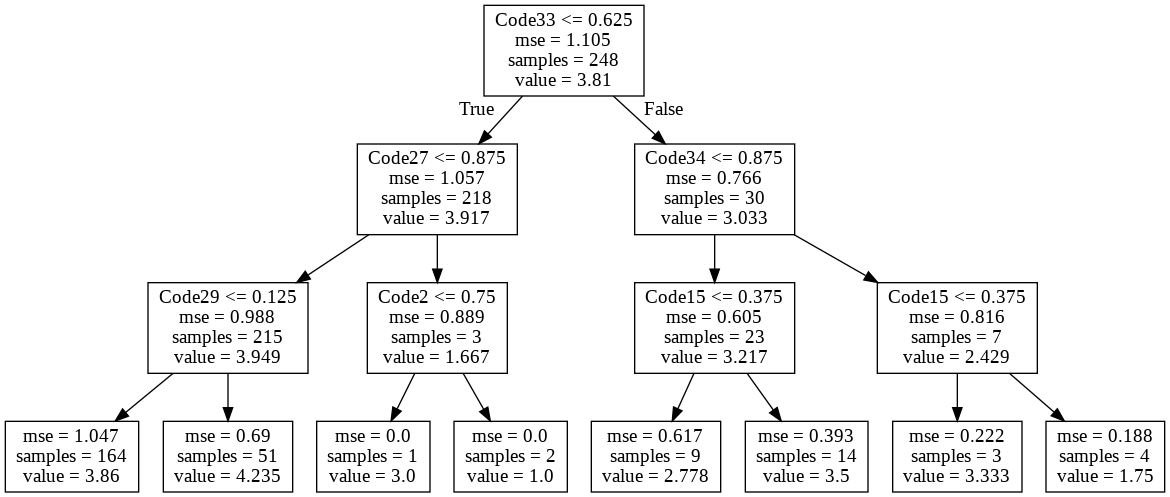

In [ ]:
#Load Libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

#Create a DOT Data

dotData = tree.export_graphviz(ABModel.estimators_[5], out_file=None, feature_names=Predictors , class_names=Target)

#Draw Graph
RFtree_graph = pydotplus.graph_from_dot_data(dotData)

#Show Graph
Image(RFtree_graph.create_png())

## XGBoost Regression

In [ ]:
# Fitting Random Forest Regressor Model
from xgboost import XGBRegressor
XGBReg = XGBRegressor(max_depth = 3, learning_rate=0.2, n_estimators = 1000, objective='reg:linear', booster='gbtree')

XGBModel = XGBReg.fit(X, y)
pred = XGBReg.predict(X)

rSq = XGBReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

[06:37:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Square value is:  0.800427137345723
The RMSE of the model is 0.47543461435163564
The MAE of the model is 0.19897403351722226
Accrracy of test data =  99.27 %


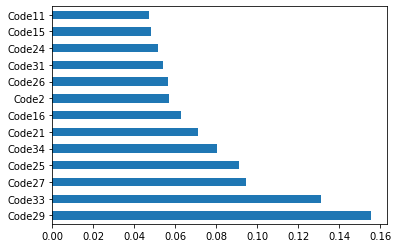

In [ ]:
# Feature by Importance
VarImp = pd.Series(XGBModel.feature_importances_ , index = Predictors)
VarImp.nlargest(13).plot(kind = 'barh')
plt.show()

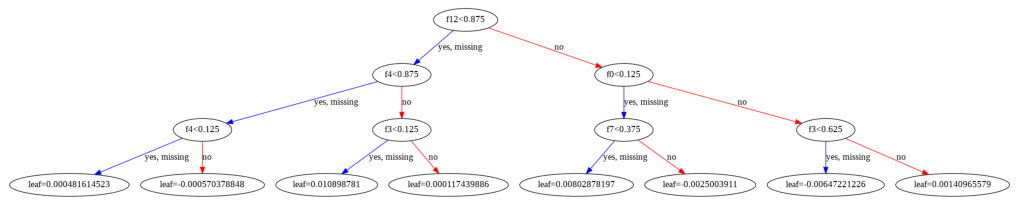

In [ ]:
#Load Libraries
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,10))
plot_tree(XGBReg, num_trees=500, ax=ax)
plt.show()

## Multilayer Perceptron

In [ ]:
X.shape

(248, 13)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Creat the ANN
model = Sequential()

model.add(Dense(units=30,input_dim=13,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1,kernel_initializer='normal'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X,y,batch_size=10,epochs=100,verbose=0)

In [ ]:
# Predictions on testing data
Predictions=model.predict(X)
TestingData=pd.DataFrame(data=X, columns=Predictors)
TestingData['Target']=y
TestingData['PredictedTarget']=Predictions
TestingData['APE'] = np.abs((y-pred)/y) * 100
TestingData.sort_values(by = 'APE',ascending=True).head(3)

,Code2,Code11,Code15,Code16,Code21,Code24,Code25,Code26,Code27,Code29,Code31,Code33,Code34,Target,PredictedTarget,APE
156,0.25,0.00,1.00,0.75,1.00,0.00,1.00,0.75,0.75,0.5,0.75,0.0,1.0,5,3.856154,0.011091
98,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.75,0.25,0.0,0.00,0.0,0.0,5,4.088474,0.019169
81,0.75,0.25,0.25,0.25,0.75,0.00,0.00,0.75,0.00,0.0,0.25,0.5,0.5,5,3.680571,0.022421


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

The RMSE of the model is 0.47543461435163564
The MAE of the model is 0.19897403351722226
Accrracy of test data =  99.27 %


# ML on "performance" & "Delight" Categories

In [ ]:
Attributes2 = ["Code9","Code20"]

In [ ]:
#Seperate Target Variable & Predictor Variables
Target = 'target'
Predictors = Attributes2

X = dataNum[Predictors].values
y = dataNum[Target].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

#Check the shapes of samples
print(X.shape)
print(y.shape)

(248, 2)
(248,)


## Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Creating the model for training data
model = LR.fit(X,y)
pred = model.predict(X)

#Regression Equation
#print(model.intercept_)
#print(model.coef_)

#Goodness of fit of model
from sklearn import metrics
print('Value of R-Square = ',metrics.r2_score(y,model.predict(X)))

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

Value of R-Square =  0.03213217644357158
The RMSE of the model is 1.047003371801736
The MAE of the model is 0.8112887802970755
Accrracy of test data =  80.45 %


## Tree Models

In [ ]:
# Fitting Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(max_depth=3, criterion='mse')

DTModel = DTReg.fit(X, y)
pred = DTReg.predict(X)

rSq = DTReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

R Square value is:  0.07647747626584389
The RMSE of the model is 1.0227366050432618
The MAE of the model is 0.8118053268858701
Accrracy of test data =  81.61 %


## XGBoost Regression

In [ ]:
# Fitting Random Forest Regressor Model
from xgboost import XGBRegressor
XGBReg = XGBRegressor(max_depth = 2, learning_rate=0.2, n_estimators = 1000, objective='reg:linear', booster='gbtree')

XGBModel = XGBReg.fit(X, y)
pred = XGBReg.predict(X)

rSq = XGBReg.score(X, y)
print("R Square value is: ",rSq)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

[06:52:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Square value is:  0.15935436102841005
The RMSE of the model is 0.9757679212164476
The MAE of the model is 0.7368258785816931
Accrracy of test data =  84.79 %


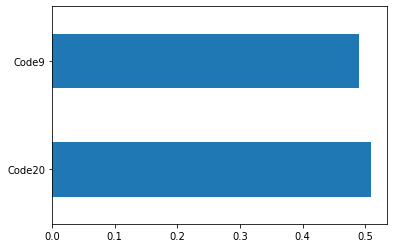

In [ ]:
# Feature by Importance
VarImp = pd.Series(XGBModel.feature_importances_ , index = Predictors)
VarImp.nlargest(2).plot(kind = 'barh')
plt.show()

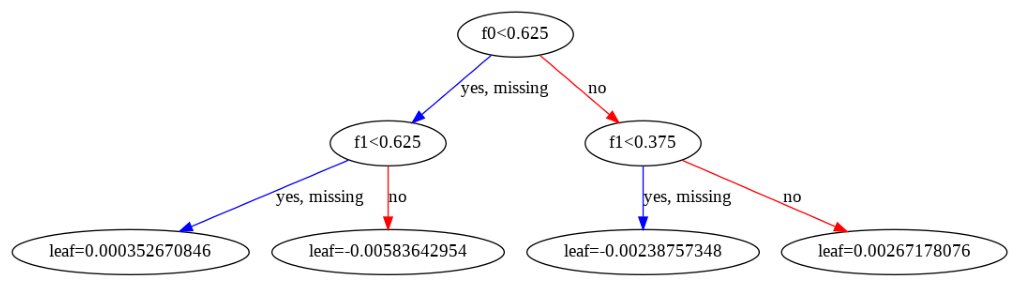

In [ ]:
#Load Libraries
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,10))
plot_tree(XGBReg, num_trees=500, ax=ax)
plt.show()

## Multilayer Perceptron

In [ ]:
X.shape

(248, 13)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Creat the ANN
model = Sequential()

model.add(Dense(units=10,input_dim=2,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1,kernel_initializer='normal'))

model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X,y,batch_size=10,epochs=100,verbose=0)

In [ ]:
# Predictions on testing data
Predictions=model.predict(X)
TestingData=pd.DataFrame(data=X, columns=Predictors)
TestingData['Target']=y
TestingData['PredictedTarget']=Predictions
TestingData['APE'] = np.abs((y-pred)/y) * 100
TestingData.sort_values(by = 'APE',ascending=True).head(3)

,Code9,Code20,Target,PredictedTarget,APE
104,0.25,0.75,4,3.595114,0.148851
43,0.25,0.75,4,3.595114,0.148851
142,0.75,0.75,4,3.462361,0.335324


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred))
mae = mean_absolute_error(y,pred)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)

#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

The RMSE of the model is 0.9757679212164476
The MAE of the model is 0.7368258785816931
Accrracy of test data =  84.79 %


# k-Means Clustering
(on 13 Selected Kano Features)

In [ ]:
#Seperate Target Variable & Predictor Variables
Target = 'target'
Predictors = SelectedAttributes

X = dataNum[Predictors].values
y = dataNum[Target].values

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

#Check the shapes of samples
print(X.shape)
print(y.shape)

(248, 13)
(248,)


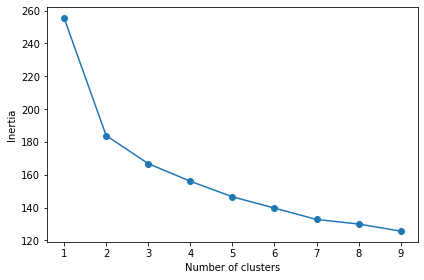

In [ ]:
# Finding the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1, 10), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

In [ ]:
# Defining the K-Means object for best number of clusters. n=4 in this case
km = KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=1)

In [ ]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[4 2 2 2 0 2 2 2 4 2 3 2 2 3 1 2 0 0 2 4 2 2 2 2 4 4 0 2 2 4 4 2 2 2 4 2 2
 4 2 2 2 4 4 0 2 2 0 0 1 2 2 4 0 2 4 2 0 3 2 0 2 4 2 1 4 0 4 4 1 3 4 4 2 3
 1 1 1 4 4 4 1 3 2 2 4 0 3 1 2 4 2 0 4 2 1 0 3 2 2 0 4 4 2 2 3 3 2 2 4 0 2
 2 0 3 3 2 3 2 2 3 2 2 3 2 2 2 0 0 3 2 0 2 2 4 0 0 3 0 3 4 4 3 4 3 0 0 0 2
 0 0 4 1 4 3 4 2 0 3 2 3 3 4 4 0 2 0 2 1 2 1 2 2 1 1 2 4 2 4 4 0 2 2 4 3 4
 4 3 2 0 0 1 3 2 3 2 2 0 2 4 2 3 0 4 4 2 3 1 4 2 0 2 2 2 4 0 4 2 3 4 4 2 2
 2 4 2 2 2 4 3 2 1 1 2 2 4 2 2 2 2 0 2 3 3 2 2 2 3 3]
Inertia: 146.20397473384315


In [ ]:
predictedCluster = predictedCluster+1
predictedCluster

array([5, 3, 3, 3, 1, 3, 3, 3, 5, 3, 4, 3, 3, 4, 2, 3, 1, 1, 3, 5, 3, 3,
       3, 3, 5, 5, 1, 3, 3, 5, 5, 3, 3, 3, 5, 3, 3, 5, 3, 3, 3, 5, 5, 1,
       3, 3, 1, 1, 2, 3, 3, 5, 1, 3, 5, 3, 1, 4, 3, 1, 3, 5, 3, 2, 5, 1,
       5, 5, 2, 4, 5, 5, 3, 4, 2, 2, 2, 5, 5, 5, 2, 4, 3, 3, 5, 1, 4, 2,
       3, 5, 3, 1, 5, 3, 2, 1, 4, 3, 3, 1, 5, 5, 3, 3, 4, 4, 3, 3, 5, 1,
       3, 3, 1, 4, 4, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 1, 1, 4, 3, 1, 3,
       3, 5, 1, 1, 4, 1, 4, 5, 5, 4, 5, 4, 1, 1, 1, 3, 1, 1, 5, 2, 5, 4,
       5, 3, 1, 4, 3, 4, 4, 5, 5, 1, 3, 1, 3, 2, 3, 2, 3, 3, 2, 2, 3, 5,
       3, 5, 5, 1, 3, 3, 5, 4, 5, 5, 4, 3, 1, 1, 2, 4, 3, 4, 3, 3, 1, 3,
       5, 3, 4, 1, 5, 5, 3, 4, 2, 5, 3, 1, 3, 3, 3, 5, 1, 5, 3, 4, 5, 5,
       3, 3, 3, 5, 3, 3, 3, 5, 4, 3, 2, 2, 3, 3, 5, 3, 3, 3, 3, 1, 3, 4,
       4, 3, 3, 3, 4, 4], dtype=int32)

In [ ]:
Reduceddata = pd.DataFrame(X)
Reduceddata['Target'] = y
Reduceddata['PredictedClusterID']=predictedCluster
Reduceddata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Target,PredictedClusterID
0,0.00,0.0,0.25,0.25,0.00,0.25,0.00,1.00,0.00,0.0,0.00,0.00,0.00,5,5
1,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5,3
2,0.75,0.0,0.00,0.25,0.25,0.00,0.00,0.25,0.25,0.0,0.00,0.00,0.00,4,3
3,0.00,0.0,0.25,0.00,0.25,0.00,0.00,0.25,0.00,0.0,0.00,0.00,0.00,4,3
4,0.25,1.0,0.50,0.50,0.50,1.00,0.75,0.75,0.50,0.5,0.75,0.75,0.75,3,1


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,predictedCluster))
mae = mean_absolute_error(y,predictedCluster)

print("The RMSE of the model is",rmse)
print("The MAE of the model is",mae)


#Accuracy of the test data
accu = round(100-(np.median(np.abs((y-pred)/y)) * 100),2)
print('Accrracy of test data = ',accu,'%')

The RMSE of the model is 1.676449781821019
The MAE of the model is 1.3830645161290323
Accrracy of test data =  84.79 %
